## Exporting: Example 02 - Polyline Flood Contours <br>
Created by Brandon Tucker in 2023 <br>
<br>
In this example, we will create contours as polylines based on the maximum flooding outputs from ADCIRC, <br> 
then export those polygons as a .kml file. <br> 
<br>
You can think of a contour as a shape that covers an area with a certain max flooding level. <br>
One of the main assumptions we make with Kalpana is that these areas have a constant flooding level. <br> 
<br>
While *polygon* contours must be used for downscaling with Kalpana, creating *polylines* is <br> 
an alternative feature of nc2shp() that we want to showcase. <br> 
<br>
For this example, we will study Hurricane Florence in 2018. <br>
**The following cell imports necessary packages and functions.**

In [2]:
!conda list

# packages in environment at /home/tomas/miniforge3:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
boltons                   23.0.0             pyhd8ed1ab_0    conda-forge
brotli-python             1.1.0           py310hc6cd4ac_0    conda-forge
bzip2                     1.0.8                h7f98852_4    conda-forge
c-ares                    1.19.1               hd590300_0    conda-forge
ca-certificates           2023.7.22            hbcca054_0    conda-forge
certifi                   2023.7.22          pyhd8ed1ab_0    conda-forge
cffi                      1.15.1          py310h255011f_3    conda-forge
charset-normalizer        3.2.0              pyhd8ed1ab_0    conda-forge
colorama                  0.4.6              pyhd8ed1ab_0    conda-forge
conda                     23.3.1          py310hff52083_0    conda-forge
co

In [4]:
import sys
sys.path.append(r'/home/tomas/github/Kalpana/kalpana')
## No need to add github repo to the path when installing Kalpana with pip install -e .
from export import *
from visualizations import *

First, let's take a look at the maxele.63.nc file, which is the primary input to Kalpana. <br>
This file contains maximum water level data as an output of ADCIRC. <br>
**The following cell creates a visualization of the maxele.63.nc file for Hurricane Florence.**
<br> <br> Note: understanding the functions to create these visualizations is not relevant to the operation of Kalpana.

Text(0.5, 0.98, 'Maximum Water Levels (Florence)')

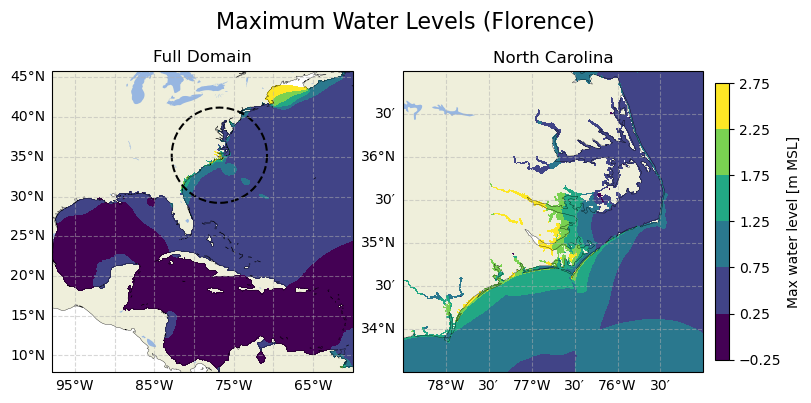

In [5]:
#plot the maximum water levels from a given maxele.63.nc file
#understanding these functions to create visualizations is not relevant to the operation of Kalpana

## path to netcdf file
nc = r'/home/tomas/Insync/tacuevas@ncsu.edu/Google Drive/NCSU/Kalpana/Examples_github/inputs/maxele.63.nc' 
## flooding levels to plot: min, max, step. creates 0.5 meter bins around each level
levels = [0, 3, 0.5]

# create two subplots
fig, ax = plt.subplots(figsize = (8,4), nrows = 1, ncols = 2,  subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)

# visualize the netcdf file for the full domain
vis_netcdf(nc, 'zeta_max', levels, ax = ax[0], cbar = False, point_circle = Point(-76.8, 35.2))
ax[0].set_title('Full Domain')

# visualize the netcdf file for the NC bounds
vis_netcdf(nc, 'zeta_max', levels, xlims = [-78.5, -75], ylims = [33.5, 37], ax = ax[1], fig = fig, cbar = True, cbar_label = 'Max water level [m MSL]', ticks = np.arange(levels[0]-0.25, levels[1]+0.25, levels[2]))
ax[1].set_title('North Carolina')
fig.suptitle('Maximum Water Levels (Florence)', fontsize = 16)

Next, we will use the nc2shp() function to create contours based on these maximum water levels. <br>
**The following cell defines our parameters for the nc2shp() function.**

In [9]:
## path of the adcirc maxele output file, must be a netcdf file
ncFile = r'/home/tomas/Insync/tacuevas@ncsu.edu/Google Drive/NCSU/Kalpana/Examples_github/inputs/maxele.63.nc' 

## name of the maxele variable to downscale. Always 'zeta_max' for downscaling
var = 'zeta_max'

## Contour levels. Min, Max and Step. Max IS included as in np.arange method. Values must be in vUnitOut vertical unit.
## from 0 to 3 meters (included) every 0.5
levels = [0, 3.0, 0.5]

## 'polyline' or 'polygon'
## we are creating polylines in this example
conType = 'polyline'

## complete path of the output file (*.shp or *.gpkg)
pathOut = r'/home/tomas/Insync/tacuevas@ncsu.edu/Google Drive/NCSU/Kalpana/Examples_github/export02/example02.shp'

## coordinate system of the output shapefile
## output in latitude and longitude, based on downscaling DEM
epsgOut = 4326

## input and output vertical units. For the momment only supported 'm' and 'ft'  
vUnitIn = 'm'  ## Default 'm'
vUnitOut = 'm'  ## Default 'ft'

## coordinate system of the adcirc input.
epsgIn = 4326  ## Default is 4326 since ADCIRC uses latitude and longitude

## complete path of the subdomain polygon kml or shapelfile, or list with the
## upper-left x, upper-left y, lower-right x and lower-right y coordinates. 
## the crs must be the same of the adcirc input file. 
subDomain = None  ## Default None

## True for export the mesh geodataframe and also save it as a shapefile. 
## for this example we are only exporting the contours, not the mesh.
exportMesh = False  ## Default False

## file name of the output mesh shapefile. Default None
meshName = None  ## Default None

## full path of the pickle file with the vertical difference between datums for each mesh node. 
dzFile = None  ## Default None

## threshold for using nearest neighbor interpolation to change datum. Points below this value won't be changed.
zeroDif = -20  ## Default -20

Now, let's call the nc2shp() function with the parameters we defined. <br>
**The following cell runs nc2shp().**
<br> <br>
Note that the output .shp file will also be saved to the path specified in the pathOut parameter.

In [10]:
## call nc2shp() and store output as geodataframe
gdf = nc2shp(ncFile, var, levels, conType, pathOut, epsgOut, vUnitOut=vUnitOut, vUnitIn=vUnitIn, epsgIn=epsgIn,
           subDomain=subDomain, exportMesh=exportMesh, meshName=meshName, dzFile=dzFile, zeroDif=zeroDif)

2024-04-04 22:23:02.126 | INFO     | export:nc2shp:801 - Start exporting adcirc to shape
2024-04-04 22:23:02.778 | INFO     | export:contours2gpd:373 - Begin computing contours using Dask
2024-04-04 22:23:02.796 | INFO     | export:contours2gpd:375 - Finish computing contours using Dask
2024-04-04 22:23:02.800 | INFO     | export:nc2shp:831 -     Ready with the contours extraction: 0.011 min
2024-04-04 22:23:03.066 | INFO     | export:nc2shp:868 -     Saving file: 0.004 min
2024-04-04 22:23:03.067 | INFO     | export:nc2shp:885 - Ready with exporting code after: 0.016 min


**The following cell visualizes the output polyline contours of nc2shp().**

Text(0.5, 0.98, 'Polygon Contours created from nc2shp()')

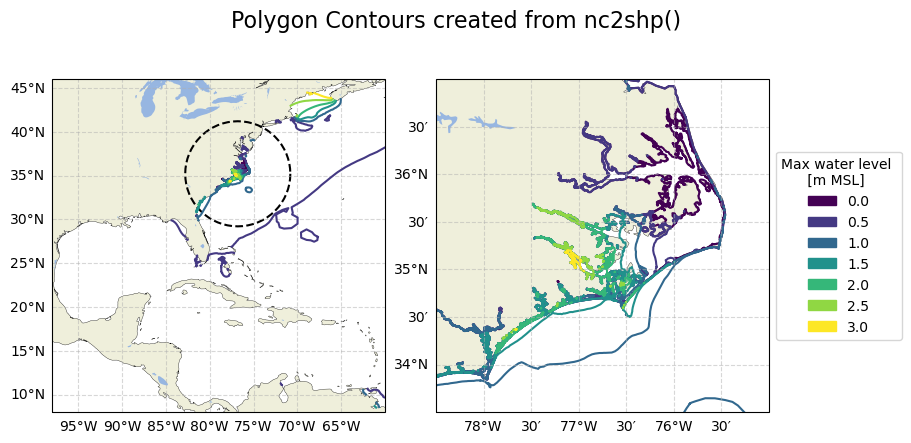

In [11]:
# create two subplots
fig, ax = plt.subplots(figsize = (9,4.5), nrows = 1, ncols = 2, subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)

# visualize polylines for the full domain
vis_plines(gdf, levels, xlims = [-98, -60], ylims = [8, 46], ax = ax[0], fig = fig, fsize = (8,6), cbar = False, point_circle = Point((-76.8, 35.2)))

# visualize polylines for the NC bounds
vis_plines(gdf, levels, xlims = [-78.5, -75], ylims = [33.5, 37], ax = ax[1], fig = fig, fsize = (8,6), cbar = True,  cbar_label = 'Max water level [m MSL]')
fig.suptitle(f'Polygon Contours created from nc2shp()', fontsize = 16)

Let's look at the original maximum flooding levels and the contours we generated side-by-side. <br>
**The following cell creates a comparison plot.**

Text(0.5, 1.0, 'Polygon Contours from nc2shp()')

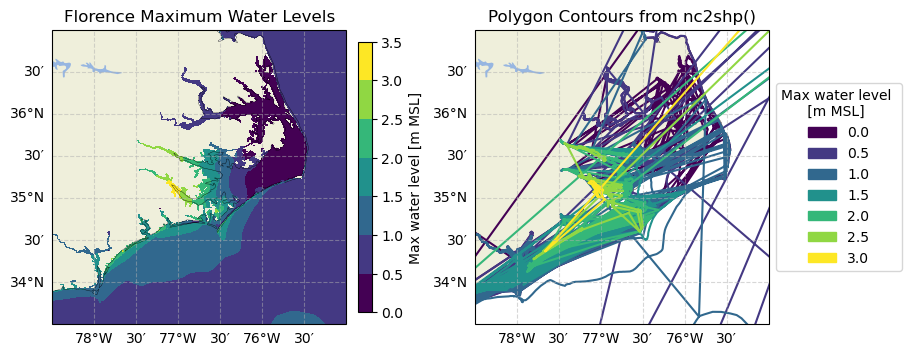

In [6]:
# create two subplots
fig, ax = plt.subplots(figsize = (9,4.5), nrows = 1, ncols = 2,  subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)

# visualize the netcdf file for the NC bounds
vis_netcdf(nc, 'zeta_max', [levels[0]+0.25, levels[1]+0.75, levels[2]], xlims = [-78.5, -75], ylims = [33.5, 37], ax = ax[0], fig = fig, cbar = True, cbar_label = 'Max water level [m MSL]', ticks = np.arange(levels[0], levels[1]+levels[2]+0.5, levels[2]))
ax[0].set_title('Florence Maximum Water Levels')

# visualize polylines for the NC bounds
vis_plines(gdf, levels, xlims = [-78.5, -75], ylims = [33.5, 37], ax = ax[1], fig = fig, fsize = (8,6), cbar = True,  cbar_label = 'Max water level [m MSL]')
ax[1].set_title('Polygon Contours from nc2shp()')

Finally, let's overlay the contours generated from nc2shp() on top of the Florence maximum water levels. <br>
All contours are shown in black for this example. As you can see, they align closely with flooding levels. <br>
**The following cell creates an overlay plot.**

Text(0.5, 1.0, 'Polylines over Florence Max Flooding Levels')

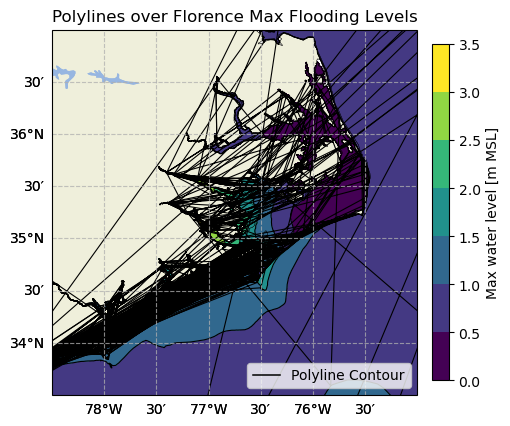

In [7]:
# define one figure and axes
fig, ax = plt.subplots(figsize = (5,5), nrows = 1, ncols = 1,  subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)

# plot the netcdf file on the axes
vis_netcdf(nc, 'zeta_max', [levels[0]+0.25, levels[1]+0.75, levels[2]], xlims = [-78.5, -75], ylims = [33.5, 37], ax = ax, fig = fig, cbar = True, cbar_label = 'Max water level [m MSL]', ticks = np.arange(levels[0], levels[1]+levels[2]+0.5, levels[2]))

# plot the polylines in black and white on the same axes
vis_plines(gdf, levels, xlims = [-78.5, -75], ylims = [33.5, 37], ax = ax, fig = fig, fsize = (5,5), outline = True)
ax.set_title('Polylines over Florence Max Flooding Levels')

Good luck with Kalpana! See you in future examples!